# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

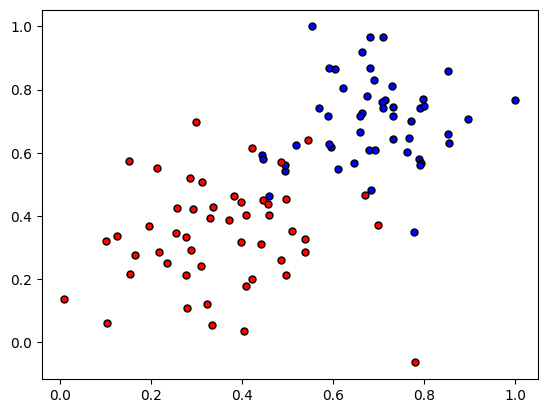

In [5]:
data = pd.read_csv('/content/data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)


plt.show()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [37]:

# Activation (sigmoid) function
def sigmoid(x):
    expl = np.exp(-x)
    sig_fun = 1/ (1 + expl)
    return sig_fun


# Output (prediction) formula
def output_formula(features, weights, bias):

    return sigmoid(np.dot(features, weights) + bias)

# Error (log-loss) formula
def error_formula(y, output):
  return  - y*(np.log(output)) - (1-y)*(np.log(1-output))



# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    weights += learnrate*(y-output)*x
    bias += learnrate*(y-output)
    return weights,bias



## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

#Model 1 with epochs = 100, learn rate = 0.01

In [43]:
#Model 1

np.random.seed(44)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()
    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.


========== Epoch 0 ==========
Train loss:  0.7135845195381634
Accuracy:  0.4

========== Epoch 10 ==========
Train loss:  0.6225835210454962
Accuracy:  0.59

========== Epoch 20 ==========
Train loss:  0.5548744083669507
Accuracy:  0.74

========== Epoch 30 ==========
Train loss:  0.501606141872473
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.45933346418614013
Accuracy:  0.86

========== Epoch 50 ==========
Train loss:  0.42525543433469976
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.39734615716713984
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3741469765239074
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.35459973368161973
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.33792736588799216
Accuracy:  0.94


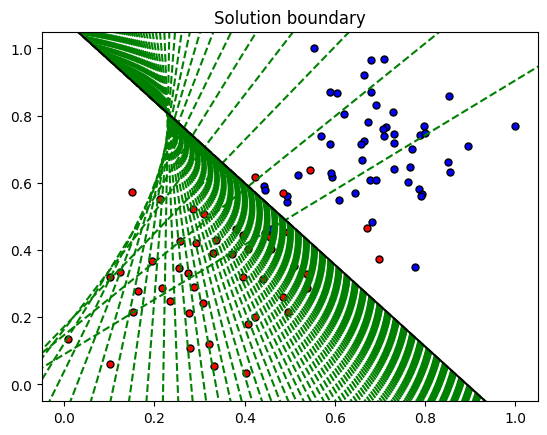

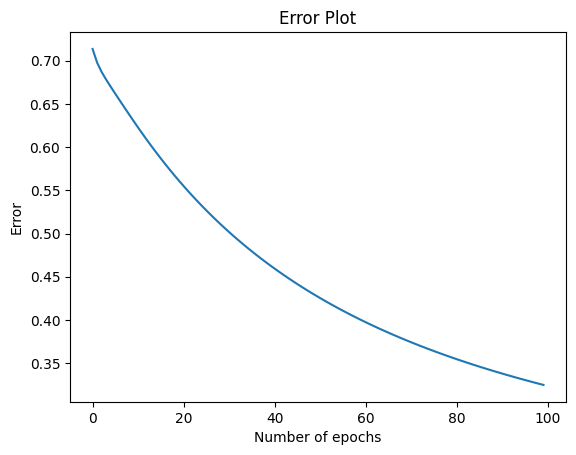

In [44]:
train(X, y, epochs, learnrate, True)

In [45]:
np.random.seed(44)

epochs = 100
learnrate = 0.02

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()
    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()


========== Epoch 0 ==========
Train loss:  0.6969355738794727
Accuracy:  0.52

========== Epoch 10 ==========
Train loss:  0.5584690875250465
Accuracy:  0.7

========== Epoch 20 ==========
Train loss:  0.4621459650408984
Accuracy:  0.84

========== Epoch 30 ==========
Train loss:  0.399464277355559
Accuracy:  0.9

========== Epoch 40 ==========
Train loss:  0.3562046267867446
Accuracy:  0.92

========== Epoch 50 ==========
Train loss:  0.3247888290187156
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.301012534472366
Accuracy:  0.94

========== Epoch 70 ==========
Train loss:  0.2824126473535083
Accuracy:  0.94

========== Epoch 80 ==========
Train loss:  0.26746873646618474
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.2551979082081021
Accuracy:  0.94


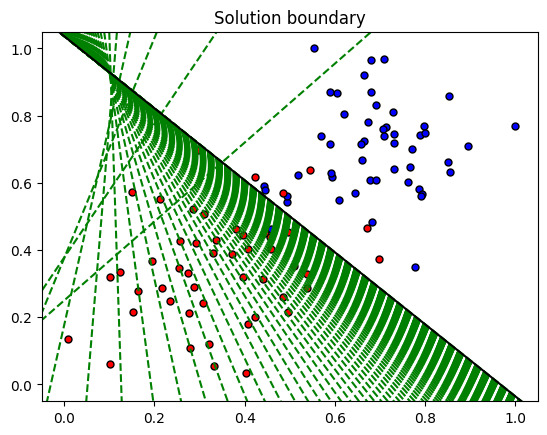

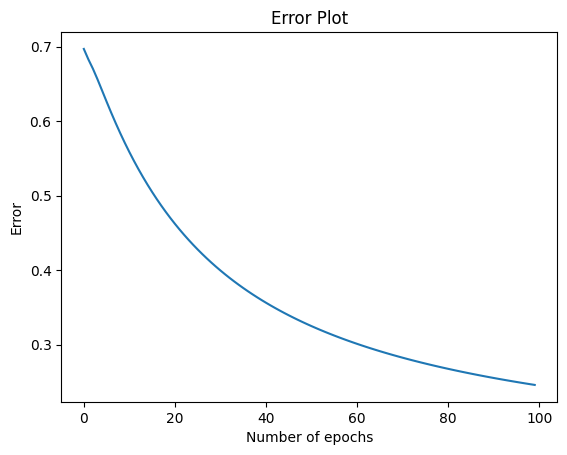

In [46]:
train(X, y, epochs, learnrate, True)

In [54]:
np.random.seed(44)

epochs = 200
learnrate = 0.02

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()
    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()




========== Epoch 0 ==========
Train loss:  0.6563306418868251
Accuracy:  0.56

========== Epoch 20 ==========
Train loss:  0.44787660773361604
Accuracy:  0.84

========== Epoch 40 ==========
Train loss:  0.35108372875287946
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.2989807571038612
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.2666391488822736
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  0.2446188142268021
Accuracy:  0.93

========== Epoch 120 ==========
Train loss:  0.22864909625709376
Accuracy:  0.93

========== Epoch 140 ==========
Train loss:  0.21652983451292127
Accuracy:  0.93

========== Epoch 160 ==========
Train loss:  0.20701416780956575
Accuracy:  0.93

========== Epoch 180 ==========
Train loss:  0.1993426952740502
Accuracy:  0.93


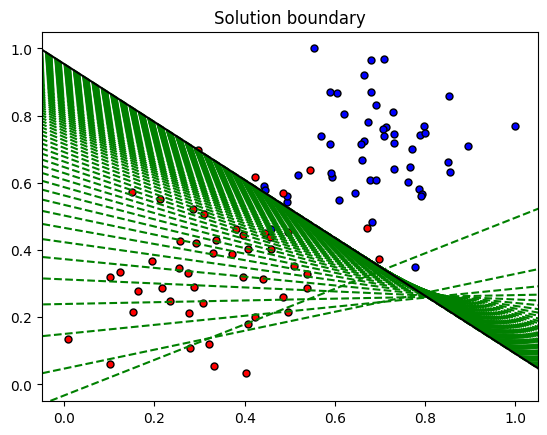

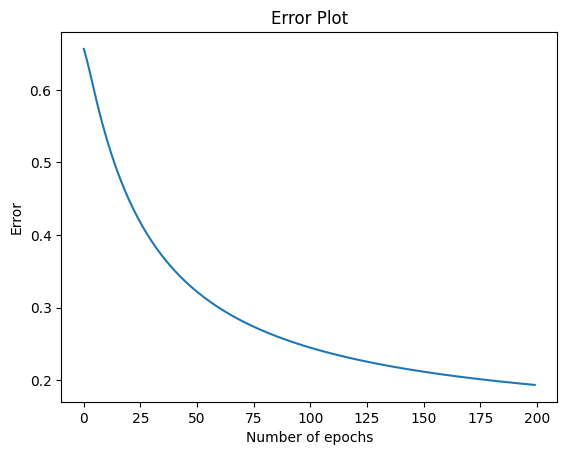

In [56]:
train(X, y, epochs, learnrate, True)

#it's worth noticing that even though the accuracy and misclassified data largely stays the same for all the 3 variations, the low error value reaching far more quickly incase of the 3rd model (upon increasing the learning rate)
#also with increasing learning rate, the training loss decreasing

In [57]:
np.random.seed(44)

epochs = 200
learnrate = 0.025

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()
    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()




========== Epoch 0 ==========
Train loss:  0.6940769236692671
Accuracy:  0.5

========== Epoch 20 ==========
Train loss:  0.43028120056022295
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.3261633574488619
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.2753929030910785
Accuracy:  0.94

========== Epoch 80 ==========
Train loss:  0.24550630107364427
Accuracy:  0.94

========== Epoch 100 ==========
Train loss:  0.22579681083338868
Accuracy:  0.94

========== Epoch 120 ==========
Train loss:  0.211800229212757
Accuracy:  0.94

========== Epoch 140 ==========
Train loss:  0.2013344135495068
Accuracy:  0.94

========== Epoch 160 ==========
Train loss:  0.19320676935238063
Accuracy:  0.94

========== Epoch 180 ==========
Train loss:  0.18670983918978043
Accuracy:  0.94


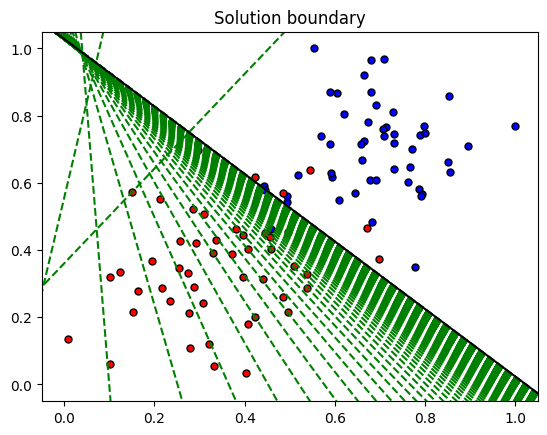

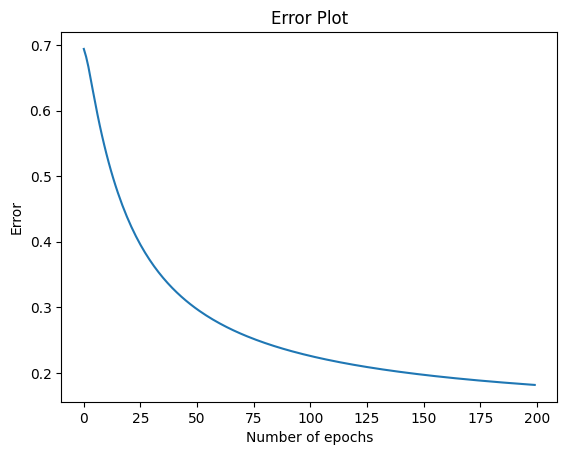

In [58]:
train(X, y, epochs, learnrate, True)

In [61]:
np.random.seed(44)

epochs = 300
learnrate = 0.3

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()
    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()




========== Epoch 0 ==========
Train loss:  1.1751801228613816
Accuracy:  0.5

========== Epoch 30 ==========
Train loss:  0.21484553334532616
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.17653368400601033
Accuracy:  0.93

========== Epoch 90 ==========
Train loss:  0.16518570421236548
Accuracy:  0.93

========== Epoch 120 ==========
Train loss:  0.16012883480610007
Accuracy:  0.93

========== Epoch 150 ==========
Train loss:  0.15741945927374978
Accuracy:  0.93

========== Epoch 180 ==========
Train loss:  0.1558043839641543
Accuracy:  0.93

========== Epoch 210 ==========
Train loss:  0.15477141555629914
Accuracy:  0.93

========== Epoch 240 ==========
Train loss:  0.15407661138347686
Accuracy:  0.93

========== Epoch 270 ==========
Train loss:  0.15359110928503208
Accuracy:  0.93


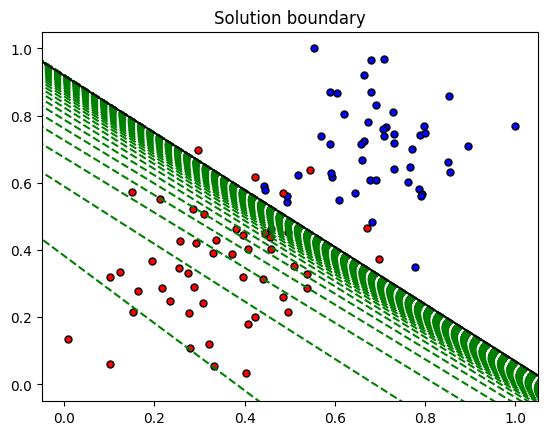

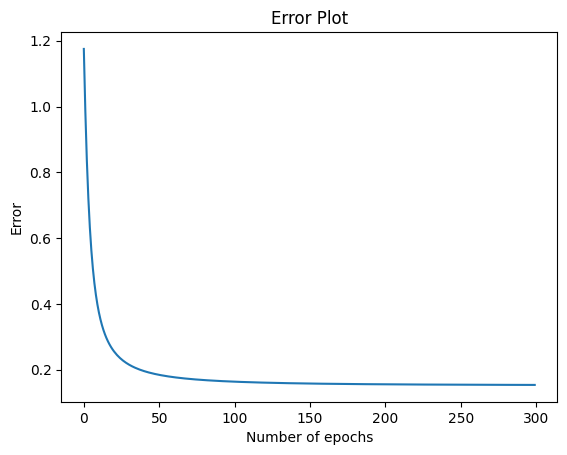

In [62]:
train(X, y, epochs, learnrate, True)

#increasing the learning rate, reduces the accuracy by 0.01% but the accuracy that was previously achieved beyond 100 epochs is now achieved at only 30th epcoh

In [65]:
np.random.seed(44)

epochs = 200
learnrate = 0.08

def train(features, targets, epochs, learnrate, graph_lines=False):

    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            weights, bias = update_weights(x, y, weights, bias, learnrate)

        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss

            # Converting the output (float) to boolean as it is a binary classification
            # e.g. 0.95 --> True (= 1), 0.31 --> False (= 0)
            predictions = out > 0.5

            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])


    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()
    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()




========== Epoch 0 ==========
Train loss:  0.7937442325686326
Accuracy:  0.5

========== Epoch 20 ==========
Train loss:  0.2940263616349225
Accuracy:  0.91

========== Epoch 40 ==========
Train loss:  0.2184811822289071
Accuracy:  0.93

========== Epoch 60 ==========
Train loss:  0.1902423593825694
Accuracy:  0.93

========== Epoch 80 ==========
Train loss:  0.17552559891258582
Accuracy:  0.93

========== Epoch 100 ==========
Train loss:  0.16653005764679116
Accuracy:  0.94

========== Epoch 120 ==========
Train loss:  0.160491681802736
Accuracy:  0.94

========== Epoch 140 ==========
Train loss:  0.1561803358516558
Accuracy:  0.94

========== Epoch 160 ==========
Train loss:  0.15296437207554534
Accuracy:  0.94

========== Epoch 180 ==========
Train loss:  0.1504858353682775
Accuracy:  0.94


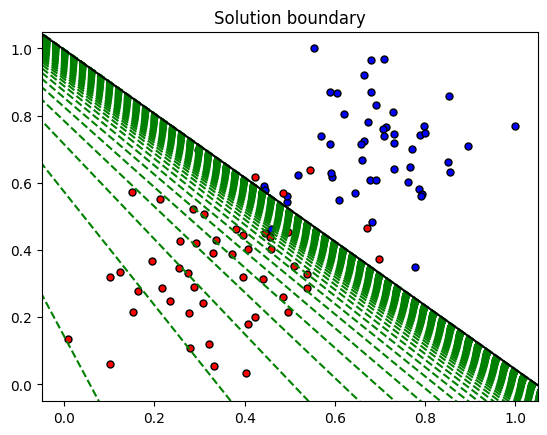

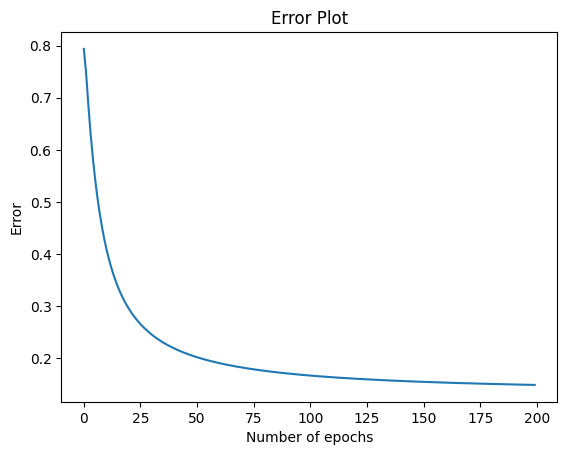

In [66]:
train(X, y, epochs, learnrate, True)
#we can continue experimenting with the learning rate and the number of epochs